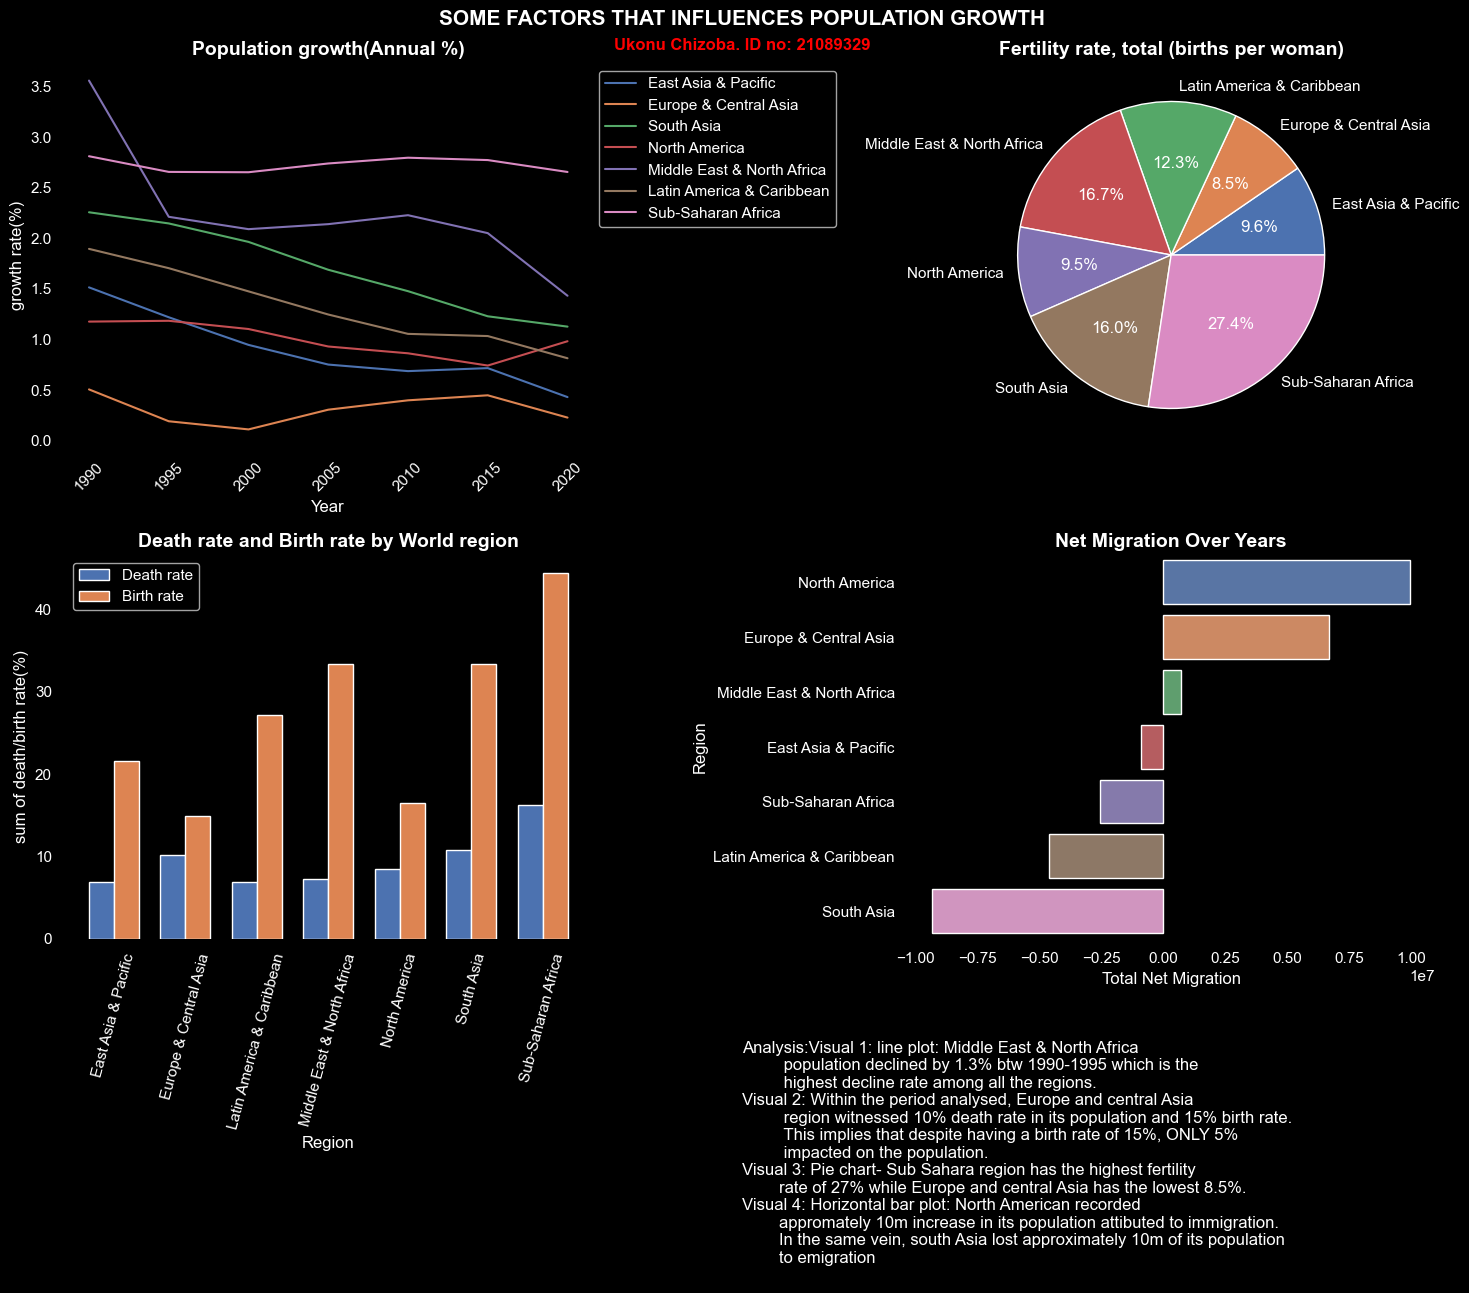

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# reading te data.
df = pd.read_excel('World_Development_Indicators(9).xlsx')

# drop unnecessary columns
df = df.drop(['Country Code', 'Series Code'],axis=1)

# renaming df dataframe years
yr_rename = yr_rename = {
    '1990 [YR1990]': 1990,
    '1995 [YR1995]': 1995,
    '2000 [YR2000]': 2000,
    '2005 [YR2005]': 2005,
    '2010 [YR2010]': 2010,
    '2015 [YR2015]': 2015,
    '2020 [YR2020]': 2020
   }

df = df.rename(yr_rename,axis=1)

# check for Nan values
df.isna().sum()

# Set the visual library style
sns.set(style="darkgrid")

# Set background color for the dashboard
fig = plt.figure(figsize=(15, 12), facecolor='black')

# Set the background color of the axes and figure
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'

# Set the text color to white
plt.rcParams['text.color'] = 'white'

# Set x and y axis label colors to white
plt.rcParams['axes.labelcolor'] = 'white'

# Set the color of the ticks label
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Set Title for the dashboard
plt.suptitle('SOME FACTORS THAT INFLUENCES POPULATION GROWTH', 
             fontsize=15, ha='center',fontweight='bold')
plt.figtext(0.5, 0.95, 'Ukonu Chizoba. ID no: 21089329', ha='center', 
            va='center', fontsize=12, color='red',fontweight='bold')

# create data frame countaining only unique countries
countries = df['Country Name'].unique()

'''create a list of the year from the columns and return only 
columns that has digits in it'''
year_columns = [col for col in df.columns if str(col).isdigit()]

# Visual 1: Line Plot - Age dependency ratio (% of working-age population)
plt.subplot(2, 2, 1)
for country in countries:
    df_pop_growth = df[(df['Country Name'] == country) & 
                       (df['Series Name'].str.contains('Population growth'))]
    sns.lineplot(x=year_columns, y=df_pop_growth[year_columns].squeeze(), 
                 label=country)

plt.title('Population growth(Annual %)',fontweight='bold', fontsize=14)
plt.xlabel('Year')
plt.ylabel('growth rate(%)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(False)
plt.xticks(year_columns, map(int, year_columns))
plt.box(False)

# Visual 2: Pie Plot - Fertility rate according to Regions
plt.subplot(2, 2, 2, facecolor='black')

# create dataframe for fertility rate
df_fertility_rate= df[df['Series Name'].str.contains('Fertility rate, total') 
                      & (df['Country Name'].isin(countries))]

# Sum values over the years
df_fertility_rate_sum = df_fertility_rate.groupby(
    'Country Name')[year_columns].sum().reset_index()

# Sum values over the period
df_fertility_rate_sum['Sum'] = df_fertility_rate_sum[year_columns].sum(axis=1)

plt.pie(df_fertility_rate_sum['Sum'], labels=df_fertility_rate_sum[
    'Country Name'], autopct='%1.1f%%')
plt.title('Fertility rate, total (births per woman)',fontweight='bold', 
          fontsize=14)


# Visual 3: Combined Bar Chart - Death rate and Birth rate by World region
plt.subplot(2, 2, 3)

# Create data fram for Death rate
df_death_rate = df[df['Series Name'].str.contains('Death rate, crude') & 
                   (df['Country Name'].isin(countries))]

# Sum values over the years
df_death_rate_sum = df_death_rate.groupby('Country Name')[
    year_columns].sum().reset_index()

# Convert to numeric
df_death_rate_sum[year_columns] = df_death_rate_sum[
    year_columns].apply(pd.to_numeric, errors='coerce', downcast='float')

# Sum values over the period
df_death_rate_sum['Sum'] = df_death_rate_sum[year_columns].sum(axis=1)

# Create data frame for Birth rate
df_birth_rate = df[df['Series Name'].str.contains('Birth rate, crude') & 
                   (df['Country Name'].isin(countries))]

# Sum values over the years
df_birth_rate_sum = df_birth_rate.groupby('Country Name')[
    year_columns].sum().reset_index()

# Convert to numeric
df_birth_rate_sum[year_columns] = df_birth_rate_sum[
    year_columns].apply(pd.to_numeric)

# Sum values over the period
df_birth_rate_sum['Sum'] = df_birth_rate_sum[year_columns].sum(axis=1)

# set the bar width
bar_width = 0.35

# set the bar position
bar_positions = np.arange(len(df_death_rate_sum['Country Name']))

# Plot each series side by side
plt.bar(bar_positions - bar_width/2, df_death_rate_sum[
    year_columns[0]], width=bar_width, label='Death rate')
plt.bar(bar_positions + bar_width/2, df_birth_rate_sum[
    year_columns[0]], width=bar_width, label='Birth rate')

plt.title('Death rate and Birth rate by World region',fontweight='bold', 
          fontsize=14)
plt.xlabel('Region')
plt.ylabel('sum of death/birth rate(%)')
plt.legend()
plt.xticks(bar_positions, df_death_rate_sum['Country Name'])
plt.xticks(rotation=75)
plt.grid(False)
plt.box(False)

# Visual 4: Horizontal Bar Plot - Sum of Urban Population Over Years
plt.subplot(2, 2, 4)

df_net_migration = df[df['Series Name'].str.contains('Net migration') & 
                      (df['Country Name'].isin(countries))]

# Sum values over the years
df_net_migration_sum = df_net_migration.groupby('Country Name')[
    year_columns].sum().reset_index()

# Convert to numeric
df_net_migration_sum[year_columns] = df_net_migration_sum[
    year_columns].apply(pd.to_numeric)

# Sum values over the period
df_net_migration_sum['Sum'] = df_net_migration_sum[year_columns].sum(axis=1)

# Sort in descending order
df_net_migration_sum = df_net_migration_sum.sort_values(by='Sum', 
                                                        ascending=False)

sns.barplot(x='Sum', y='Country Name', data=df_net_migration_sum, orient='h')
plt.title('Net Migration Over Years',fontweight='bold', fontsize=14)
plt.xlabel('Total Net Migration')
plt.ylabel('Region')
plt.grid(False)
plt.box(False)

# Add an overall overview text
plt.text(0.5, 0.02,'''Analysis:Visual 1: line plot: Middle East & North Africa 
         population declined by 1.3% btw 1990-1995 which is the 
         highest decline rate among all the regions.\n'''
         '''Visual 2: Within the period analysed, Europe and central Asia 
         region witnessed 10% death rate in its population and 15% birth rate.
         This implies that despite having a birth rate of 15%, ONLY 5%
         impacted on the population.\n'''
        '''Visual 3: Pie chart- Sub Sahara region has the highest fertility 
        rate of 27% while Europe and central Asia has the lowest 8.5%.\n'''
        '''Visual 4: Horizontal bar plot: North American recorded 
        appromately 10m increase in its population attibuted to immigration. 
        In the same vein, south Asia lost approximately 10m of its population 
        to emigration\n''',
         color='white', ha='left', va='center', transform=fig.transFigure)


plt.tight_layout()

plt.show();